# Tutorial 1: Data Cleaning and Visualization

In [28]:
#Import the required python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
#read in the the Golden Delicious data
gd=pd.read_excel('Detect-GD.xlsx')

In [30]:
gd.head(5)

,Sample,Condition,Age,Source,11995.49,11991.63,11987.78,11983.92,11980.06,11976.21,...,4034.497,4030.64,4026.783,4022.926,4019.069,4015.211,4011.354,4007.497,4003.64,3999.783
0,GD-ch-bruise1.5h-10a,B,1h,S1,-0.083126,-0.082581,-0.082173,-0.081704,-0.081251,-0.080829,...,1.208914,1.216652,1.219303,1.207366,1.191071,1.185219,1.183722,1.175261,1.168796,1.191991
1,GD-ch-bruise1.5h-10b,B,1h,S1,-0.154684,-0.154762,-0.154668,-0.154153,-0.153504,-0.153067,...,0.744595,0.745167,0.743545,0.744555,0.750424,0.752385,0.752032,0.755532,0.755115,0.747916
2,GD-ch-bruise1.5h-10c,S,1h,S1,-0.066006,-0.065688,-0.065200,-0.064603,-0.064006,-0.063497,...,1.443587,1.456797,1.474139,1.478318,1.455842,1.425429,1.414297,1.446042,1.510794,1.534620
3,GD-ch-bruise1.5h-10d,S,1h,S1,-0.110366,-0.110041,-0.109542,-0.109117,-0.108661,-0.108094,...,1.257423,1.262108,1.269531,1.262279,1.243150,1.235391,1.237499,1.246332,1.265530,1.268394
4,GD-ch-bruise1.5h-11a,B,1h,S1,-0.142115,-0.141852,-0.141603,-0.141129,-0.140701,-0.140477,...,0.697953,0.696903,0.699350,0.704406,0.707838,0.709304,0.710684,0.711052,0.707295,0.703002


In [31]:
gd.shape

(547, 2078)

In [32]:
#to clean the data we want to have a dataset that we can understand

gd_wavenum=np.float_(gd.columns[4:])
gd_wavelen=(1/gd_wavenum)*10**7
gd.columns.values[4:]=np.round(gd_wavelen,3)

gd.head()

,Sample,Condition,Age,Source,833.647,833.915,834.183,834.451,834.72,834.989,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,GD-ch-bruise1.5h-10a,B,1h,S1,-0.083126,-0.082581,-0.082173,-0.081704,-0.081251,-0.080829,...,1.208914,1.216652,1.219303,1.207366,1.191071,1.185219,1.183722,1.175261,1.168796,1.191991
1,GD-ch-bruise1.5h-10b,B,1h,S1,-0.154684,-0.154762,-0.154668,-0.154153,-0.153504,-0.153067,...,0.744595,0.745167,0.743545,0.744555,0.750424,0.752385,0.752032,0.755532,0.755115,0.747916
2,GD-ch-bruise1.5h-10c,S,1h,S1,-0.066006,-0.065688,-0.065200,-0.064603,-0.064006,-0.063497,...,1.443587,1.456797,1.474139,1.478318,1.455842,1.425429,1.414297,1.446042,1.510794,1.534620
3,GD-ch-bruise1.5h-10d,S,1h,S1,-0.110366,-0.110041,-0.109542,-0.109117,-0.108661,-0.108094,...,1.257423,1.262108,1.269531,1.262279,1.243150,1.235391,1.237499,1.246332,1.265530,1.268394
4,GD-ch-bruise1.5h-11a,B,1h,S1,-0.142115,-0.141852,-0.141603,-0.141129,-0.140701,-0.140477,...,0.697953,0.696903,0.699350,0.704406,0.707838,0.709304,0.710684,0.711052,0.707295,0.703002


In [33]:
gd.Condition.unique()

array(['B', 'S'], dtype=object)

<AxesSubplot:xlabel='Condition', ylabel='count'>

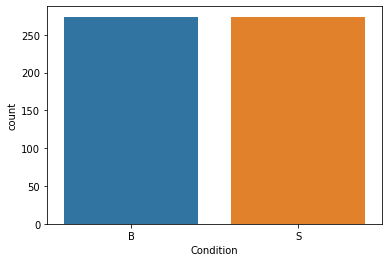

In [34]:
sns.countplot(x='Condition',data=gd)

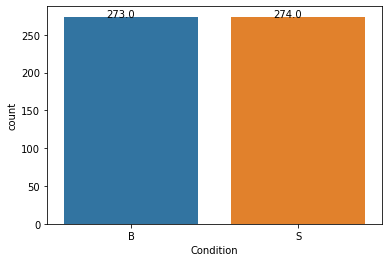

In [35]:
#for the frequencies
#using seaborn counterplot, we will plot the frquencies
#for the Golden declicious:

gd_cond = sns.countplot(x="Condition",data=gd)
#To display the number of the bruised and sound on the plots
for a in gd_cond.patches:
    gd_cond.annotate('{:.1f}'.format(a.get_height()), (a.get_x()+0.25, a.get_height()+0.01))

plt.show()

# visualization of the data

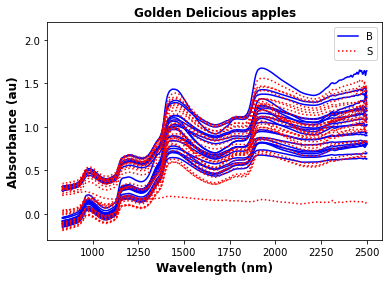

In [36]:
#ploting the condition against the wavelengths

Xgd=gd.iloc[:,4:]
Ygd=gd.Condition

num=50
np.random.seed(0)
randGd=np.random.choice(len(gd),num,replace=False)

Xgdn=Xgd.to_numpy(dtype='float')
Ygdn=Ygd.to_numpy(dtype='str')

Xgdn=Xgdn[randGd,:]
Ygdn=Ygdn[randGd]

S_Flag=(Ygdn=='S')
B_Flag=(Ygdn=='B')

plt.figure(figsize=(6, 4))

# Since we are plotting a 2D numpy array, we will need to be carful with the labels, as we will need just one label to present the type of graph (S, B) 

plt.plot(np.array(Xgd.columns),np.transpose(Xgdn[B_Flag,:])[:,:1],'b-', label = "B") # just graph the first wavelength of type 'B' with the lables 
plt.plot(np.array(Xgd.columns),np.transpose(Xgdn[B_Flag,:])[:,1:],'b-') # graphs the rest of the wavelengths of type 'B' without thier labels 
    
# We make the second curve dashed so that it doesn't cover up the first
plt.plot(np.array(Xgd.columns),np.transpose(Xgdn[S_Flag,:])[:,:1],'r:', label = "S")  # just graph the first wavelength of type 'S' without the lables
plt.plot(np.array(Xgd.columns),np.transpose(Xgdn[S_Flag,:])[:,1:],'r:') # graphs the rest of the wavelengths of type 'S' without thier labels

plt.title("Golden Delicious apples", fontweight ='bold', fontsize =12)    
plt.xlabel("Wavelength (nm)", fontweight ='bold', fontsize =12)
plt.ylabel("Absorbance (au)", fontweight ='bold', fontsize =12)
plt.ylim([-.3,2.2])

plt.legend()

plt.show()

In [37]:
##StandardScalar

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xgd_scaled = scaler.fit_transform(Xgd)

Xgd = pd.DataFrame(xgd_scaled, columns = Xgd.columns)

Xgd

,833.647,833.915,834.183,834.451,834.720,834.989,835.258,835.527,835.796,836.066,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,-0.731725,-0.730176,-0.728727,-0.727461,-0.726642,-0.725518,-0.724313,-0.725130,-0.725457,-0.723712,...,0.546056,0.574183,0.579372,0.526487,0.460490,0.443868,0.446451,0.415474,0.390292,0.485206
1,-1.091111,-1.092839,-1.093328,-1.092337,-1.090818,-1.089728,-1.089482,-1.089551,-1.088223,-1.086292,...,-1.292529,-1.288633,-1.289674,-1.279227,-1.254336,-1.253172,-1.262276,-1.249641,-1.248508,-1.277802
2,-0.645740,-0.645299,-0.643366,-0.641336,-0.639719,-0.638135,-0.636717,-0.636566,-0.635741,-0.633507,...,1.475302,1.522985,1.580512,1.583641,1.490876,1.385676,1.359118,1.489694,1.745120,1.845467
3,-0.868533,-0.868143,-0.866378,-0.865521,-0.864794,-0.862983,-0.861361,-0.861849,-0.862523,-0.861921,...,0.738139,0.753778,0.776696,0.740737,0.663161,0.640581,0.659312,0.697421,0.773504,0.788531
4,-1.027988,-1.027977,-1.027624,-1.026741,-1.026286,-1.026253,-1.025533,-1.024548,-1.023454,-1.022714,...,-1.477221,-1.479322,-1.463297,-1.435875,-1.420067,-1.422083,-1.425940,-1.426095,-1.437950,-1.456115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,-0.189975,-0.190901,-0.190235,-0.189389,-0.191424,-0.195746,-0.197555,-0.195286,-0.192623,-0.192692,...,0.367447,0.273551,0.263806,0.307068,0.286683,0.230939,0.209507,0.245654,0.369018,0.516014
543,-0.253723,-0.253582,-0.256496,-0.259383,-0.259734,-0.260837,-0.264524,-0.265279,-0.261194,-0.256631,...,-0.996738,-1.013982,-1.006576,-0.966727,-0.919994,-0.905660,-0.915580,-0.931365,-0.958646,-0.990852
544,-0.053975,-0.055295,-0.058111,-0.060912,-0.062198,-0.063607,-0.063761,-0.061905,-0.059853,-0.057656,...,0.475311,0.441656,0.425435,0.439938,0.400322,0.325418,0.342025,0.418953,0.416168,0.386331
545,-0.327951,-0.330562,-0.332937,-0.334624,-0.336659,-0.337866,-0.336044,-0.332283,-0.328306,-0.326333,...,-0.571854,-0.564302,-0.555436,-0.583571,-0.631514,-0.665160,-0.652100,-0.570231,-0.459750,-0.430918


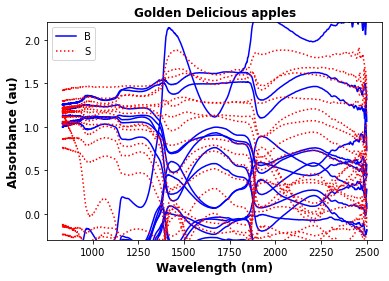

In [38]:
Xgdn=Xgd.to_numpy(dtype='float')
Ygdn=Ygd.to_numpy(dtype='str')

Xgdn=Xgdn[randGd,:]
Ygdn=Ygdn[randGd]

S_Flag=(Ygdn=='S')
B_Flag=(Ygdn=='B')

plt.figure(figsize=(6, 4))

# Since we are plotting a 2D numpy array, we will need to be carful with the labels, as we will need just one label to present the type of graph (S, B) 

plt.plot(np.array(Xgd.columns),np.transpose(Xgdn[B_Flag,:])[:,:1],'b-', label = "B") # just graph the first wavelength of type 'B' with the lables 
plt.plot(np.array(Xgd.columns),np.transpose(Xgdn[B_Flag,:])[:,1:],'b-') # graphs the rest of the wavelengths of type 'B' without thier labels 
    
# We make the second curve dashed so that it doesn't cover up the first
plt.plot(np.array(Xgd.columns),np.transpose(Xgdn[S_Flag,:])[:,:1],'r:', label = "S")  # just graph the first wavelength of type 'S' without the lables
plt.plot(np.array(Xgd.columns),np.transpose(Xgdn[S_Flag,:])[:,1:],'r:') # graphs the rest of the wavelengths of type 'S' without thier labels

plt.title("Golden Delicious apples", fontweight ='bold', fontsize =12)    
plt.xlabel("Wavelength (nm)", fontweight ='bold', fontsize =12)
plt.ylabel("Absorbance (au)", fontweight ='bold', fontsize =12)
plt.ylim([-.3,2.2])

plt.legend()

plt.show()

In [39]:
%store  Xgd
%store  Ygd
%store  gd

Stored 'Xgd' (DataFrame)
Stored 'Ygd' (Series)
Stored 'gd' (DataFrame)
